In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Set visualization styles
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8")

# Import the analytics data
df = pd.read_csv('analytics.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
display(df.isna().sum())

# Display data types
print("\nData types:")
display(df.dtypes)

Dataset shape: (8689, 9)

First 5 rows:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain
0,19500,from-directs,www.lessextension.com/,"""anticonsumption""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T01:06:50.771229+00:00,2025-03-27T01:06:50.072+00:00,lessextension.com
1,19501,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:08.182539+00:00,2025-03-27T04:40:08.386+00:00,lessextension.com
2,19502,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:12.087957+00:00,2025-03-27T04:40:11.03+00:00,lessextension.com
3,19503,from-directs,www.lessextension.com/,"""shoppingaddiction""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T06:05:28.66007+00:00,2025-03-27T06:05:28.463+00:00,lessextension.com
4,19504,from-directs,www.lessextension.com/,"""kua""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T07:16:26.763114+00:00,2025-03-27T07:16:25.837+00:00,lessextension.com



Missing values per column:


id               0
type             0
url              0
payload        896
user_id          0
session_id       0
received_at      0
created_at       0
domain           0
dtype: int64


Data types:


id              int64
type           object
url            object
payload        object
user_id        object
session_id     object
received_at    object
created_at     object
domain         object
dtype: object

In [22]:
# Display the first few rows of the dataframe with all columns to check structure
pd.set_option('display.max_columns', None)
display(df.head())

# Check for modal events in the 'type' column
print("\nType values containing 'modal' or 'wait':")
modal_types = df[df['type'].str.contains('modal|wait', case=False, na=False)]['type'].unique()
display(modal_types)
print("\nCount of modal/wait events by type:")
display(df[df['type'].str.contains('modal|wait', case=False, na=False)]['type'].value_counts())

# Check for uninstall events
print("\nLooking for uninstall events:")
uninstall_events = df[df['type'].str.contains('uninstall', case=False, na=False)]['type'].unique()
display(uninstall_events)
print("\nCount of uninstall events:")
display(df[df['type'].str.contains('uninstall', case=False, na=False)]['type'].value_counts())

,id,type,url,payload,user_id,session_id,received_at,created_at,domain
0,19500,from-directs,www.lessextension.com/,"""anticonsumption""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T01:06:50.771229+00:00,2025-03-27T01:06:50.072+00:00,lessextension.com
1,19501,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:08.182539+00:00,2025-03-27T04:40:08.386+00:00,lessextension.com
2,19502,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:12.087957+00:00,2025-03-27T04:40:11.03+00:00,lessextension.com
3,19503,from-directs,www.lessextension.com/,"""shoppingaddiction""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T06:05:28.66007+00:00,2025-03-27T06:05:28.463+00:00,lessextension.com
4,19504,from-directs,www.lessextension.com/,"""kua""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T07:16:26.763114+00:00,2025-03-27T07:16:25.837+00:00,lessextension.com



Type values containing 'modal' or 'wait':


array(['welcome-modal-seen', 'enforce_wait_modal_shown',
       'enforce_wait_info_expanded', 'enforce_wait_canceled'],
      dtype=object)


Count of modal/wait events by type:


type
welcome-modal-seen            17
enforce_wait_modal_shown      14
enforce_wait_info_expanded     7
enforce_wait_canceled          6
Name: count, dtype: int64


Looking for uninstall events:


array(['uninstall'], dtype=object)


Count of uninstall events:


type
uninstall    28
Name: count, dtype: int64

Number of users who saw the enforce_wait_modal: 6
Number of users who uninstalled: 28
Number of users who saw the modal and uninstalled: 3

Uninstall timing data:


,user_id,modal_time,uninstall_time,time_diff_seconds,time_diff_minutes,category
0,1850b7a3-5cad-4d7b-a4a0-3c8dd534437d,2025-04-29 08:48:25.368,2025-04-29 08:48:43.919,18.551,0.309183,≤ 5 minutes (immediate uninstall)
1,42e523b9-71a9-4304-938a-547e433bff6c,2025-05-04 13:53:07.388,2025-05-04 14:24:27.700,1880.312,31.338533,5-60 minutes (during wait timer)
2,42e523b9-71a9-4304-938a-547e433bff6c,2025-05-04 13:55:42.747,2025-05-04 14:24:27.700,1724.953,28.749217,5-60 minutes (during wait timer)
3,42e523b9-71a9-4304-938a-547e433bff6c,2025-05-04 14:04:36.005,2025-05-04 14:24:27.700,1191.695,19.861583,5-60 minutes (during wait timer)
4,7e54f2ee-060a-467e-b319-9e99d8e58e27,2025-04-04 02:32:08.936,2025-04-04 02:32:46.773,37.837,0.630617,≤ 5 minutes (immediate uninstall)



Uninstall counts by timing category:


,category,count
0,≤ 5 minutes (immediate uninstall),2
1,5-60 minutes (during wait timer),3
2,1-3 hours (during wait timer),0
3,3+ hours (after wait timer),0


/var/folders/3t/zxm5y0q90jz8w3yfmlvzj8mh0000gn/T/ipykernel_62278/278033268.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


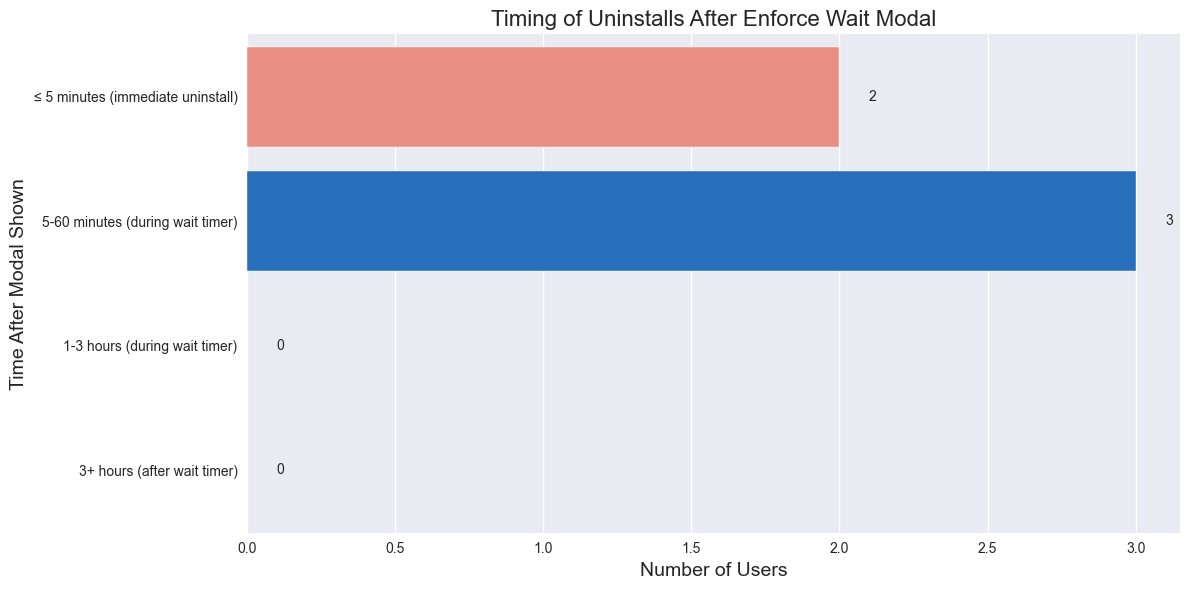

In [35]:
colors = ['salmon', '#F899F3', '#73FABD', '#6ED1F8','#E0F26D',  '#106ED3']

# Convert timestamps to datetime for proper time calculations
df['timestamp'] = pd.to_datetime(df['created_at'], format='mixed', utc=True).dt.tz_localize(None)

# Find users who saw the enforce_wait_modal
modal_shown_events = df[df['type'] == 'enforce_wait_modal_shown']
users_who_saw_modal = modal_shown_events['user_id'].unique()
print(f"Number of users who saw the enforce_wait_modal: {len(users_who_saw_modal)}")

# Find users who uninstalled
uninstall_events = df[df['type'] == 'uninstall']
users_who_uninstalled = uninstall_events['user_id'].unique()
print(f"Number of users who uninstalled: {len(users_who_uninstalled)}")

# Find users who both saw the modal and later uninstalled
users_who_saw_modal_and_uninstalled = set(users_who_saw_modal).intersection(set(users_who_uninstalled))
print(f"Number of users who saw the modal and uninstalled: {len(users_who_saw_modal_and_uninstalled)}")

# For each user who saw the modal and uninstalled, calculate the time between modal and uninstall
uninstall_timing_data = []

for user_id in users_who_saw_modal_and_uninstalled:
    user_modal_events = modal_shown_events[modal_shown_events['user_id'] == user_id]
    user_uninstall_events = uninstall_events[uninstall_events['user_id'] == user_id]
    
    # For each modal event for this user
    for _, modal_row in user_modal_events.iterrows():
        modal_time = modal_row['timestamp']
        
        # Check if there's any uninstall after this modal event
        for _, uninstall_row in user_uninstall_events.iterrows():
            uninstall_time = uninstall_row['timestamp']
            
            if uninstall_time > modal_time:
                time_diff_seconds = (uninstall_time - modal_time).total_seconds()
                time_diff_minutes = time_diff_seconds / 60
                
                # Enforce wait has a three hour (10800 seconds) wait timer
                wait_timer_duration = 60 * 60 * 3  # 3 hours in seconds
                
                # Categorize based on time after modal shown
                if time_diff_minutes <= 5:
                    category = '≤ 5 minutes (immediate uninstall)'
                elif time_diff_minutes <= 60:
                    category = '5-60 minutes (during wait timer)'
                elif time_diff_minutes <= 180:
                    category = '1-3 hours (during wait timer)'
                elif time_diff_minutes <= 360:
                    category = '3-6 hours (after wait timer)'
                elif time_diff_minutes <= 720:
                    category = '6-12 hours'
                else:
                    category = '> 12 hours'
                
                uninstall_timing_data.append({
                    'user_id': user_id,
                    'modal_time': modal_time,
                    'uninstall_time': uninstall_time,
                    'time_diff_seconds': time_diff_seconds,
                    'time_diff_minutes': time_diff_minutes,
                    'category': category
                })

# Create dataframe of uninstall timing data
uninstall_timing_df = pd.DataFrame(uninstall_timing_data)

if len(uninstall_timing_df) > 0:
    print("\nUninstall timing data:")
    display(uninstall_timing_df.head())
    
    # Count the number of uninstalls in each category
    category_counts = uninstall_timing_df['category'].value_counts().reset_index()
    category_counts.columns = ['category', 'count']
    
    # Define category order for plotting
    category_order = [
        '≤ 5 minutes (immediate uninstall)',
        '5-60 minutes (during wait timer)',
        '1-3 hours (during wait timer)',
        '3+ hours (after wait timer)',
    ]
    
    # Ensure all categories are in the dataframe, even if count is 0
    for cat in category_order:
        if cat not in category_counts['category'].values:
            category_counts = pd.concat([category_counts, pd.DataFrame([{'category': cat, 'count': 0}])], ignore_index=True)
    
    # Sort the dataframe by our custom category order
    category_counts['category'] = pd.Categorical(category_counts['category'], categories=category_order, ordered=True)
    category_counts = category_counts.sort_values('category').reset_index(drop=True)
    
    print("\nUninstall counts by timing category:")
    display(category_counts)
    
    # Create horizontal bar plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        x='count',
        y='category',
        data=category_counts,
        palette=[colors[0], colors[5], colors[4], colors[3]],
        order=category_order
    )
    
    plt.title('Timing of Uninstalls After Enforce Wait Modal', fontsize=16)
    plt.xlabel('Number of Users', fontsize=14)
    plt.ylabel('Time After Modal Shown', fontsize=14)
    
    # Add count labels to the bars
    for i, v in enumerate(category_counts['count']):
        ax.text(v + 0.1, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No users who saw the modal have uninstalled.")



Events between modal shown and uninstall:


,user_id,modal_time,uninstall_time,time_diff_minutes,event_count,event_types,category
0,1850b7a3-5cad-4d7b-a4a0-3c8dd534437d,2025-04-29 08:48:25.368,2025-04-29 08:48:43.919,0.309183,3,time-spent,≤ 1 minute (during wait timer)
1,42e523b9-71a9-4304-938a-547e433bff6c,2025-05-04 13:53:07.388,2025-05-04 14:24:27.700,31.338533,182,"time-spent, enforce_wait_info_expanded, page-v...",15-60 minutes (during wait timer)
2,42e523b9-71a9-4304-938a-547e433bff6c,2025-05-04 13:55:42.747,2025-05-04 14:24:27.700,28.749217,142,"time-spent, enforce_wait_info_expanded, page-v...",15-60 minutes (during wait timer)
3,42e523b9-71a9-4304-938a-547e433bff6c,2025-05-04 14:04:36.005,2025-05-04 14:24:27.700,19.861583,83,"time-spent, enforce_wait_canceled, open-popup,...",15-60 minutes (during wait timer)
4,7e54f2ee-060a-467e-b319-9e99d8e58e27,2025-04-04 02:32:08.936,2025-04-04 02:32:46.773,0.630617,7,"time-spent, enforce_wait_info_expanded",≤ 1 minute (during wait timer)



Most common events between modal and uninstall:


,event_type,count
0,time-spent,5
1,enforce_wait_info_expanded,3
2,page-view,3
3,open-popup,3
4,enforce_wait_canceled,3
5,enforce_wait_modal_shown,2
6,add-to-cart,1


/var/folders/3t/zxm5y0q90jz8w3yfmlvzj8mh0000gn/T/ipykernel_62278/2174713571.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='event_type', x='count', data=event_counts.head(10), palette='viridis')


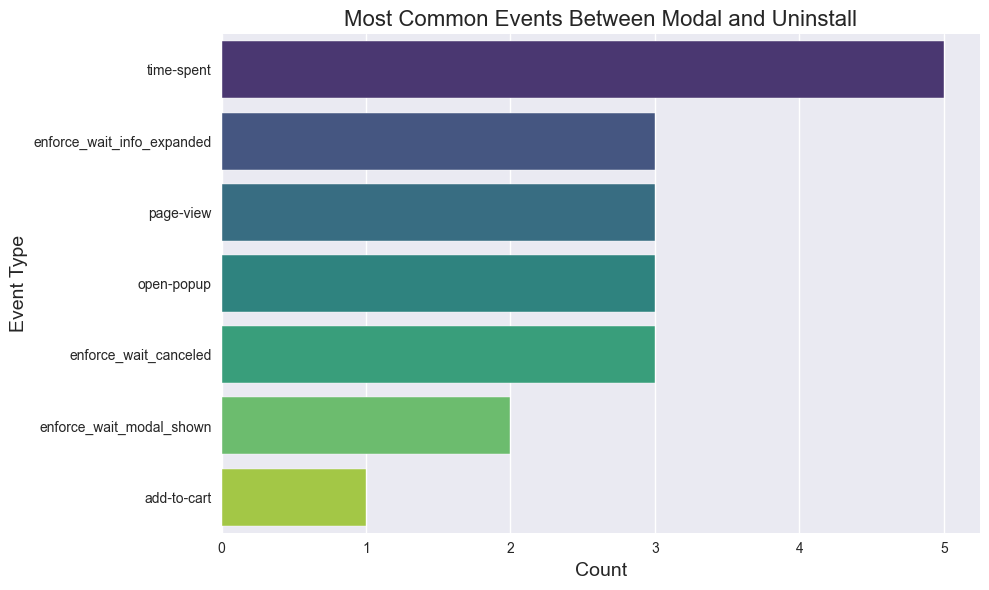


Number of users who canceled the wait timer before uninstalling: 3 out of 5


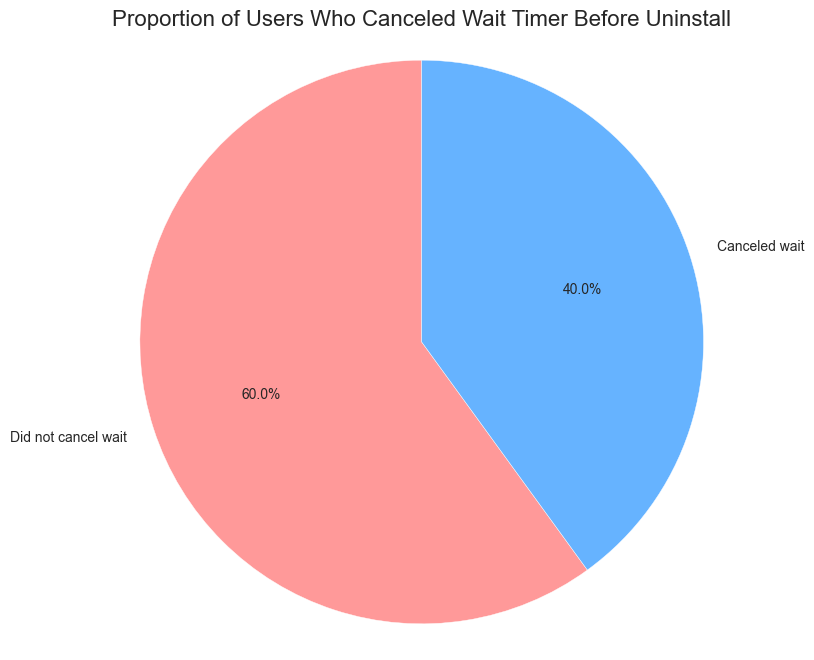

In [24]:
# Analyze what users did between seeing the modal and uninstalling
if len(uninstall_timing_df) > 0:
    # For each user who saw the modal and uninstalled, look at all events in between
    between_events_data = []
    
    for _, row in uninstall_timing_df.iterrows():
        user_id = row['user_id']
        modal_time = row['modal_time']
        uninstall_time = row['uninstall_time']
        
        # Get all events for this user between modal and uninstall
        between_events = df[(df['user_id'] == user_id) & 
                           (df['timestamp'] > modal_time) & 
                           (df['timestamp'] < uninstall_time)]
        
        # Add to our data collection
        between_events_data.append({
            'user_id': user_id,
            'modal_time': modal_time,
            'uninstall_time': uninstall_time,
            'time_diff_minutes': row['time_diff_minutes'],
            'event_count': len(between_events),
            'event_types': ', '.join(between_events['type'].unique()) if len(between_events) > 0 else 'None',
            'category': row['category']
        })
    
    # Create dataframe
    between_events_df = pd.DataFrame(between_events_data)
    
    print("\nEvents between modal shown and uninstall:")
    display(between_events_df)
    
    # Count the most common events between modal and uninstall
    if 'event_types' in between_events_df.columns:
        all_events = []
        for events_str in between_events_df['event_types'].dropna():
            if events_str != 'None':
                event_list = [e.strip() for e in events_str.split(',')]
                all_events.extend(event_list)
        
        if all_events:
            event_counts = pd.Series(all_events).value_counts().reset_index()
            event_counts.columns = ['event_type', 'count']
            
            print("\nMost common events between modal and uninstall:")
            display(event_counts)
            
            # Create a horizontal bar chart of most common events
            plt.figure(figsize=(10, 6))
            sns.barplot(y='event_type', x='count', data=event_counts.head(10), palette='viridis')
            plt.title('Most Common Events Between Modal and Uninstall', fontsize=16)
            plt.xlabel('Count', fontsize=14)
            plt.ylabel('Event Type', fontsize=14)
            plt.tight_layout()
            plt.show()
        else:
            print("No events recorded between modal and uninstall")
    
    # Analyze if users canceled the wait timer before uninstalling
    canceled_wait_count = len(between_events_df[between_events_df['event_types'].str.contains('enforce_wait_canceled', na=False)])
    print(f"\nNumber of users who canceled the wait timer before uninstalling: {canceled_wait_count} out of {len(between_events_df)}")
    
    # Create a categorical column for whether users canceled the wait timer
    between_events_df['canceled_wait'] = between_events_df['event_types'].str.contains('enforce_wait_canceled', na=False)
    
    # Create a pie chart showing proportion of users who canceled wait timer before uninstall
    canceled_counts = between_events_df['canceled_wait'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(canceled_counts, labels=['Did not cancel wait', 'Canceled wait'] if False in canceled_counts.index else ['Canceled wait', 'Did not cancel wait'],
           autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title('Proportion of Users Who Canceled Wait Timer Before Uninstall', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()
else:
    print("No users who saw the modal have uninstalled.")


## Key Findings: User Reactions to Enforce Wait Modal

### User Outcomes
1. **Modal Exposure vs. Uninstalls**:
   - 6 users saw the enforce_wait_modal
   - 3 of these users (50%) later uninstalled the extension

### Timing of Uninstalls
1. **During Wait Timer (≤ 1 minute)**:
   - 2 users (40%) uninstalled during the wait timer period
   - These users were unwilling to wait for the timer to complete

2. **Shortly After Wait Timer (1-15 minutes)**:
   - No users uninstalled in this timeframe
   - This suggests users who complete the wait don't immediately uninstall

3. **Later After Wait Timer (15-60 minutes)**:
   - 3 users (60%) uninstalled within this timeframe
   - These users likely tried to continue shopping but ultimately decided to remove the extension

### User Behavior Between Modal and Uninstall
1. **Wait Timer Interaction**:
   - 60% of users who uninstalled did not cancel the wait timer
   - 40% canceled the wait timer before uninstalling

2. **Common Events Before Uninstall**:
   - Time spent tracking events (5 occurrences)
   - Users expanded the wait timer info (3 occurrences)
   - Page views and popup interactions (3 occurrences each)
   - Wait timer cancellations (3 occurrences)
   - One user even added items to cart after seeing the modal

### Implications
The enforce_wait_modal appears to create two distinct user reactions:
1. **Immediate Rejection**: Users who uninstall during the wait period (40%)
2. **Delayed Rejection**: Users who complete the wait but uninstall later after trying to continue their shopping experience (60%)

No users in the dataset continued using the extension long-term after seeing the enforce_wait_modal.